In [ ]:
from sys import stdout

import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

from sklearn.metrics import confusion_matrix

In [ ]:
# data = mpimg.imread(r'C:\Users\nadra\Python\Data\seismics1\seismic-1184.png')
# data = data[:,:,:1]/255

# mask = mpimg.imread(r'C:\Users\nadra\Python\Data\faults\fault-1184.png').copy()
# mask = (mask-mask.min())/(mask.max()-mask.min())

# plt.matshow(data[:,:,0], interpolation='spline16', cmap=plt.cm.gray, aspect=1)
# plt.matshow(mask, interpolation='spline16', aspect=1)



In [ ]:
#Start from here (1 image of seismic and fault)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import os

# # Function to load the seismic and fault images
# def load_data(seismic_path, fault_path):
#     # Read the seismic image (RGB)
#     seismic_img = mpimg.imread(seismic_path)
    
#     # Read the fault mask image (assumed to be in grayscale or RGB format)
#     fault_img = mpimg.imread(fault_path)
    
#     # # Convert the seismic image (RGB) to grayscale using the luminosity method
#     # # Grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B
#     # grayscale_seismic = 0.2989 * seismic_img[:, :, 0] + 0.5870 * seismic_img[:, :, 1] + 0.1140 * seismic_img[:, :, 2]
    
#     # Convert fault mask to grayscale if it has 3 channels
#     if len(fault_img.shape) == 3:  # Check if RGB
#         fault_img = 0.2989 * fault_img[:, :, 0] + 0.5870 * fault_img[:, :, 1] + 0.1140 * fault_img[:, :, 2]
    
#     # Normalize the fault mask to [0, 1]
#     fault_mask_grayscale = (fault_img - fault_img.min()) / (fault_img.max() - fault_img.min())    
    
#     return seismic_img, fault_mask_grayscale

# # Example usage with a single pair of images
# seismic_path = r'C:\Users\nadra\Python\Data\seismics1\seismic-1184.png' 
# fault_path = r'C:\Users\nadra\Python\Data\faults\fault-1184.png'

# # Load the seismic and fault data
# seismic_img, fault_mask_grayscale = load_data(seismic_path, fault_path)

# # Check the shape of the data
# print(f"Seismic grayscale image shape: {seismic_img.shape}")
# print(f"Fault mask shape: {fault_mask_grayscale.shape}")

# # Visualize the grayscale seismic image and overlay the fault mask
# plt.figure(figsize=(10, 10))

# # Display the grayscale seismic image
# plt.imshow(seismic_img, alpha=1.0)  # Seismic image in grayscale
# plt.axis('off')  # Hide axis

# # Overlay the fault mask with transparency (grayscale)
# plt.imshow(fault_mask_grayscale, cmap='gray', alpha=0.6)  # Fault mask in grayscale
# plt.axis('off')  # Hide axis

# # Show the result
# plt.show()


In [ ]:
# # Check the range of values in the seismic and fault images
# print(f"Seismic image range: {grayscale_seismic.min()} to {grayscale_seismic.max()}")
# print(f"Fault mask range: {fault_mask_grayscale.min()} to {fault_mask_grayscale.max()}")

In [ ]:
#Step 2: Upload all image from folder

In [ ]:
# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from sklearn.model_selection import train_test_split

# # Define the paths to your seismic and fault image folders
# seismic_dir = r'C:\Users\nadra\Python\Data\seismics1'
# fault_dir = r'C:\Users\nadra\Python\Data\faults'

# # Function to load images and limit to 100 images
# def load_images(seismic_dir, fault_dir, limit=50, img_size=(256, 256)):
#     seismic_images = []
#     fault_masks = []
    
#     # Get all seismic image filenames (assuming they are .png files)
#     seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
#     fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.png')][:limit]
    
#     # Iterate over the files and load them
#     for seismic_file, fault_file in zip(seismic_files, fault_files):
#         # Load seismic image and fault mask
#         seismic_img_path = os.path.join(seismic_dir, seismic_file)
#         fault_img_path = os.path.join(fault_dir, fault_file)
        
#         # Load the seismic image (convert to grayscale if needed)
#         seismic_img = image.load_img(seismic_img_path, target_size=img_size)
#         seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]
        
#         # Load the fault mask image (assuming binary mask)
#         fault_img = image.load_img(fault_img_path, target_size=img_size, color_mode='grayscale')
#         fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]
        
#         seismic_images.append(seismic_img)
#         fault_masks.append(fault_img)
    
#     return np.array(seismic_images), np.array(fault_masks)

# # Load images from folder and limit to 100
# X, y = load_images(seismic_dir, fault_dir, limit=50, img_size=(256, 256))  # Resize to (64, 64)

# # Check the shape of loaded data
# print(f"Seismic images shape: {X.shape}")
# print(f"Fault masks shape: {y.shape}")



In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image

# # Define the paths to your seismic and fault image folders
# seismic_dir = r'C:\Users\nadra\Python\Data\seismics1'  # Path to seismic images folder
# fault_dir = r'C:\Users\nadra\Python\Data\faults'      # Path to fault masks folder

# # Function to load and match seismic and fault images based on the last 4 digits
# def load_images(seismic_dir, fault_dir, limit=50, img_size=(2664, 2664)):
#     seismic_images = []
#     fault_masks = []
#     fault_sums = []
    
#     # Get all seismic and fault image filenames (assuming they are .png files)
#     seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
#     fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.png')][:limit]
    
#     # Extract the 4-digit numbers from both directories to match
#     seismic_ids = [f[-8:-4] for f in seismic_files]  # Extract 4 digits from the filenames
#     fault_ids = [f[-8:-4] for f in fault_files]     # Extract 4 digits from the filenames
    
#     # Find the intersection of the seismic and fault file IDs
#     common_ids = list(set(seismic_ids).intersection(fault_ids))
    
#     # Iterate over the common IDs and load corresponding images
#     for id in common_ids:
#         # Find the seismic file and fault file that corresponds to this ID
#         seismic_file = [f for f in seismic_files if f[-8:-4] == id][0]
#         fault_file = [f for f in fault_files if f[-8:-4] == id][0]
        
#         # Load seismic image
#         seismic_img_path = os.path.join(seismic_dir, seismic_file)
#         seismic_img = image.load_img(seismic_img_path , target_size=img_size, color_mode='grayscale')
#         seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]

#         # Clip values to ensure they are strictly between 0 and 1
#         seismic_img = np.clip(seismic_img, 0.001, 0.999)

#         # Ensure maximum value is strictly < 1
#         seismic_img = np.where(seismic_img == 1, 0.999, seismic_img)
        
#         # Load the fault mask
#         fault_img_path = os.path.join(fault_dir, fault_file)
#         fault_img = image.load_img(fault_img_path, target_size=img_size, color_mode='grayscale')
#         fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]
        
#         # # Invert the fault mask: 0 should be fault (black), 1 should be background (white)
#         fault_img = 1 - fault_img  # Invert the mask: 1 = fault, 0 = background
        
#         # Binarize the fault mask (1 = fault, 0 = background)
#         fault_img = (fault_img > 0.5).astype(np.float32)  # Convert to binary (0 or 1)
        
#         # Store the sum of fault pixels for validation
#         fault_sum = np.sum(fault_img)
#         fault_sums.append(fault_sum)
        
#         seismic_images.append(seismic_img)
#         fault_masks.append(fault_img)
    
#     # Convert lists to numpy arrays
#     seismic_images = np.array(seismic_images)
#     fault_masks = np.array(fault_masks)
    
#     # Validate fault mask sums
#     if any(fault_sum == 0 for fault_sum in fault_sums):
#         print("Warning: One or more fault masks are empty!")
#     print(f"Total fault pixels across dataset: {np.sum(fault_masks)}")
    
#     return seismic_images, fault_masks

# # Load images with validation
# X, y = load_images(seismic_dir, fault_dir, limit=50,img_size=(2664, 2664))

# # Check the shape of loaded data
# print(f"Seismic images shape: {X.shape}")
# print(f"Fault masks shape: {y.shape}")

# # Function to overlay seismic image and fault mask
# def overlay_seismic_fault(X, y, num_samples=5):
#     for i in range(num_samples):
#         plt.figure(figsize=(10, 10))
        
#         # Seismic image
#         plt.imshow(X[i], cmap='gray', alpha=1)  # Display seismic image with transparency
        
#         # Fault mask overlay (using 'jet' color map for better visualization)
#         plt.imshow(y[i].squeeze(), cmap='gray', alpha=0.5)  # Fault mask with some transparency
        
#         plt.title(f"Overlay Seismic Image and Fault Mask {i}")
#         plt.axis()
#         plt.show()

# # Visualize the first 5 samples with overlay
# overlay_seismic_fault(X, y)

# # Validate the fault mask (check if values are between 0 and 1)
# def validate_fault_mask(y):
#     for i in range(len(y)):
#         unique_vals = np.unique(y[i])
#         if not np.all(np.isin(unique_vals, [0, 1])):  # Check if values are only 0 or 1
#             print(f"Warning: Fault mask {i} contains values other than 0 and 1! Unique values: {unique_vals}")
#         else:
#             print(f"Fault mask {i} is valid (contains only 0s and 1s).")

# # Validate fault masks
# validate_fault_mask(y)


In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image
# from PIL import Image

# # Define the paths to your seismic and fault image folders
# seismic_dir = r'C:\Users\nadra\Python\Data\seismics1'  # Path to seismic images folder
# fault_dir = r'C:\Users\nadra\Python\Data\faults'      # Path to fault masks folder

# # Function to load and match seismic and fault images based on the last 4 digits
# def load_images(seismic_dir, fault_dir, limit=50, img_size=(1024, 1024)):
#     seismic_images = []
#     fault_masks = []
#     fault_sums = []
    
#     # Get all seismic and fault image filenames (assuming they are .png files)
#     seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
#     fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.png')][:limit]
    
#     # Extract the 4-digit numbers from both directories to match
#     seismic_ids = [f[-8:-4] for f in seismic_files]  # Extract 4 digits from the filenames
#     fault_ids = [f[-8:-4] for f in fault_files]     # Extract 4 digits from the filenames
    
#     # Find the intersection of the seismic and fault file IDs
#     common_ids = list(set(seismic_ids).intersection(fault_ids))
    
#     # Iterate over the common IDs and load corresponding images
#     for id in common_ids:
#         # Find the seismic file and fault file that corresponds to this ID
#         seismic_file = [f for f in seismic_files if f[-8:-4] == id][0]
#         fault_file = [f for f in fault_files if f[-8:-4] == id][0]
        
#         # Load seismic image
#         seismic_img_path = os.path.join(seismic_dir, seismic_file)
#         seismic_img = image.load_img(seismic_img_path, color_mode='grayscale')
        
#         # Resize the image while maintaining quality
#         seismic_img = seismic_img.resize(img_size, Image.LANCZOS)  # LANCZOS is a high-quality resampling filter
#         seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]

#         # Clip values to ensure they are strictly between 0 and 1
#         seismic_img = np.clip(seismic_img, 0.001, 0.999)

#         # Ensure maximum value is strictly < 1
#         seismic_img = np.where(seismic_img == 1, 0.999, seismic_img)
        
#         # Load the fault mask
#         fault_img_path = os.path.join(fault_dir, fault_file)
#         fault_img = image.load_img(fault_img_path, color_mode='grayscale')
        
#         # Resize fault image
#         fault_img = fault_img.resize(img_size, Image.LANCZOS)
#         fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]
        
#         # Invert the fault mask: 0 should be fault (black), 1 should be background (white)
#         fault_img = 1 - fault_img  # Invert the mask: 1 = fault, 0 = background
        
#         # Binarize the fault mask (1 = fault, 0 = background)
#         fault_img = (fault_img > 0.5).astype(np.float32)  # Convert to binary (0 or 1)
        
#         # Store the sum of fault pixels for validation
#         fault_sum = np.sum(fault_img)
#         fault_sums.append(fault_sum)
        
#         seismic_images.append(seismic_img)
#         fault_masks.append(fault_img)
    
#     # Convert lists to numpy arrays
#     seismic_images = np.array(seismic_images)
#     fault_masks = np.array(fault_masks)
    
#     # Validate fault mask sums
#     if any(fault_sum == 0 for fault_sum in fault_sums):
#         print("Warning: One or more fault masks are empty!")
#     print(f"Total fault pixels across dataset: {np.sum(fault_masks)}")
    
#     return seismic_images, fault_masks

# # Load images with validation
# X, y = load_images(seismic_dir, fault_dir, limit=50, img_size=(1024, 1024))

# # Check the shape of loaded data
# print(f"Seismic images shape: {X.shape}")
# print(f"Fault masks shape: {y.shape}")

# # Function to overlay seismic image and fault mask
# def overlay_seismic_fault(X, y, num_samples=5):
#     for i in range(num_samples):
#         plt.figure(figsize=(10, 10))
        
#         # Seismic image
#         plt.imshow(X[i], cmap='gray', alpha=1)  # Display seismic image with transparency
        
#         # Fault mask overlay (using 'jet' color map for better visualization)
#         plt.imshow(y[i].squeeze(), cmap='gray', alpha=0.5)  # Fault mask with some transparency
        
#         plt.title(f"Overlay Seismic Image and Fault Mask {i}")
#         plt.axis()
#         plt.show()

# # Visualize the first 5 samples with overlay
# overlay_seismic_fault(X, y)

# # Validate the fault mask (check if values are between 0 and 1)
# def validate_fault_mask(y):
#     for i in range(len(y)):
#         unique_vals = np.unique(y[i])
#         if not np.all(np.isin(unique_vals, [0, 1])):  # Check if values are only 0 or 1
#             print(f"Warning: Fault mask {i} contains values other than 0 and 1! Unique values: {unique_vals}")
#         else:
#             print(f"Fault mask {i} is valid (contains only 0s and 1s).")

# # Validate fault masks
# validate_fault_mask(y)


In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

raw_fault_dir = r"C:\Users\nadra\Python\Data\faults - Copy"  #Folder containing raw faults images
fault_mask_dir = r"C:\Users\nadra\Python\Data\faults_masks"  #Folder to save binary masks
raw_seismic_dir = r"C:\Users\nadra\Python\Data\seismics1 - Copy"  #Folder containing seismic images
overlay_output_dir = r"C:\Users\nadra\Python\Data\overlay images"  #Folder to save overlayed images

# Create output directories if they don't exist
os.makedirs(fault_mask_dir, exist_ok=True)
os.makedirs(overlay_output_dir, exist_ok=True)

In [2]:
# Process fault images and save binary masks
for name in os.listdir(raw_fault_dir):
    filename = name.split('.')[0]

    # Try loading the image (error handling)
    try:
        img = cv2.imread(os.path.join(raw_fault_dir, name))
    except Exception as e:
        print(f"Error reading image {name}: {str(e)}")
        continue  # Skip to the next image

    if img is None:
        print(f"Image {name} is empty or corrupted")
        continue  # Skip to the next image

    # Convert to grayscale and process further...
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    binary_image = cv2.bitwise_not(binary_image)

    # Convert to binary format (0 and 1)
    binary_mask = binary_image // 255

    # Save the binary mask as a .npy file
    np.save(os.path.join(fault_mask_dir, filename + '.npy'), binary_mask)

In [3]:
print("Files in raw_seismic_dir:", os.listdir(raw_seismic_dir))
print("Files in fault_mask_dir:", os.listdir(fault_mask_dir))


Files in raw_seismic_dir: ['seismic-1000.png', 'seismic-1001.png', 'seismic-1002.png', 'seismic-1003.png', 'seismic-1004.png', 'seismic-1005.png', 'seismic-1006.png', 'seismic-1007.png', 'seismic-1008.png', 'seismic-1009.png', 'seismic-1010.png', 'seismic-1011.png', 'seismic-1012.png', 'seismic-1013.png', 'seismic-1014.png', 'seismic-1015.png', 'seismic-1016.png', 'seismic-1017.png', 'seismic-1018.png', 'seismic-1019.png', 'seismic-1020.png', 'seismic-1021.png', 'seismic-1022.png', 'seismic-1023.png', 'seismic-1024.png', 'seismic-1025.png', 'seismic-1026.png', 'seismic-1027.png', 'seismic-1028.png', 'seismic-1029.png', 'seismic-1030.png', 'seismic-1031.png', 'seismic-1032.png', 'seismic-1033.png', 'seismic-1034.png', 'seismic-1035.png', 'seismic-1036.png', 'seismic-1037.png', 'seismic-1038.png', 'seismic-1039.png', 'seismic-1040.png', 'seismic-1041.png', 'seismic-1042.png', 'seismic-1043.png', 'seismic-1044.png', 'seismic-1045.png', 'seismic-1046.png', 'seismic-1047.png', 'seismic-1048

In [ ]:
# #Step 2: Overlay seismic images with corresponding fault masks
# for name in os.listdir(raw_seismic_dir):
#     filename = os.path.splitext(name)[0].split('-')[-1]
#     seismic_path = os.path.join(raw_seismic_dir, name)
#     fault_mask_path = os.path.join(fault_mask_dir, f"fault-{filename}.npy")

#     # Check if corresponding fault mask exists
#     if not os.path.exists(fault_mask_path):
#         print(f"Warning: No fault mask found for {filename}. Skipping.")
#         continue

#     # Load seismic image and fault mask
#     img = cv2.imread(seismic_path)
#     fault_mask = np.load(fault_mask_path)

#     # Invert the fault mask
#     inverted_fault_mask = cv2.bitwise_not(fault_mask * 255)

#     # Convert binary image to a 3-channel image for overlay (BGR format)
#     fault_mask_bgr = cv2.cvtColor(inverted_fault_mask, cv2.COLOR_GRAY2BGR)

#     # Resize fault mask to match the seismic image dimensions
#     fault_mask_resized = cv2.resize(fault_mask_bgr, (img.shape[1], img.shape[0]))

#     # Overlay the seismic image and fault mask
#     overlay = cv2.addWeighted(img, 0.5, fault_mask_resized, 0.5, 0)

#     # Save the overlay image
#     cv2.imwrite(os.path.join(overlay_output_dir, filename + "_overlay.png"), overlay)

# print(f"Overlay process completed. Images saved to {overlay_output_dir}")

In [ ]:
# # Convert to grayscale
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Apply binary thresholding
# _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# binary_image = cv2.bitwise_not(binary_image)

# # Convert to binary format (0 and 1)
# binary_mask = binary_image // 255

# # Save the binary mask as a .npy file
# mask_path = os.path.join(fault_mask_dir, f"{filename}.npy")
# np.save(mask_path, binary_mask)
# print(f"Binary mask saved for {name} at {mask_path}")

In [4]:
# Load the .npy file
file_path = r"C:\Users\nadra\Python\Data\faults_masks\fault-1000.npy"  # Replace with your file path
binary_mask = np.load(file_path)

# Print the array
print("Loaded NumPy Array:")
print(binary_mask)

# Check the shape and data type of the array
print("Shape:", binary_mask.shape)
print("Data Type:", binary_mask.dtype)

Loaded NumPy Array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape: (2664, 4166)
Data Type: uint8


In [ ]:
# import os

# def find_mismatched_files(seismic_folder, fault_folder):
#     # Get list of seismic and fault file IDs (assuming the format is 'seismic-<ID>.png' and 'fault-<ID>.png')
#     seismic_files = [int(f.split('-')[1].split('.')[0]) for f in os.listdir(seismic_folder) if f.endswith('.png')]
#     fault_files = [int(f.split('-')[1].split('.')[0]) for f in os.listdir(fault_folder) if f.endswith('.png')]

#     # Find mismatched files
#     mismatched_fault_files = set(fault_files) - set(seismic_files)
#     mismatched_seismic_files = set(seismic_files) - set(fault_files)

#     # Print mismatched files
#     if mismatched_fault_files:
#         print("Fault files without corresponding seismic files:")
#         for file_id in mismatched_fault_files:
#             print(f"fault-{file_id}.png")
#     else:
#         print("No mismatched fault files found.")

#     if mismatched_seismic_files:
#         print("\nSeismic files without corresponding fault files:")
#         for file_id in mismatched_seismic_files:
#             print(f"seismic-{file_id}.png")
#     else:
#         print("No mismatched seismic files found.")

# # Use raw strings for paths (this avoids issues with backslashes)
# seismic_folder = r"C:\Users\nadra\Python\Data\seismics1 - Copy"
# fault_folder = r"C:\Users\nadra\Python\Data\faults - Copy"

# find_mismatched_files(seismic_folder, fault_folder)


In [38]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Define the paths to your seismic and fault image folders
seismic_dir = r"C:\Users\nadra\Python\Data\overlay images"
fault_dir = r"C:\Users\nadra\Python\Data\faults_masks"

# Function to load images 
def load_images(seismic_dir, fault_dir, limit=400, img_size=(256, 256)):
    seismic_images = []
    fault_masks = []

    # Get all seismic image filenames (assuming they are .png files)
    seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
    fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.npy')][:limit]

    # Extract 4-digit numbers from filenames
    seismic_ids = [f.split('-')[-1].split('.')[0] for f in seismic_files]
    fault_ids = [f.split('-')[-1].split('.')[0] for f in fault_files]

    # Iterate over the files and load them
    for seismic_file, fault_file in zip(seismic_files, fault_files):
        # Extract the 4-digit ID from filenames
        seismic_id = seismic_file.split('-')[-1].split('.')[0]
        fault_id = fault_file.split('-')[-1].split('.')[0]

        # Check if the IDs match
        if seismic_id == fault_id:
            # Load seismic image
            seismic_img_path = os.path.join(seismic_dir, seismic_file)
            seismic_img = image.load_img(seismic_img_path, target_size=img_size)
            seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]

            # Load fault mask image (assuming binary mask)
            fault_img_path = os.path.join(fault_dir, fault_file)
            fault_img = image.load_img(fault_img_path, target_size=img_size, color_mode='grayscale')
            fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]

            seismic_images.append(seismic_img)
            fault_masks.append(fault_img)

    return np.array(seismic_images), np.array(fault_masks)

# Load images
X, y = load_images(seismic_dir, fault_dir, limit=200, img_size=(256, 256))  # Resize to (256, 256)

# Check the shape of loaded data
print(f"Seismic images shape: {X.shape}")
print(f"Fault masks shape: {y.shape}")


Seismic images shape: (0,)
Fault masks shape: (0,)


In [ ]:
print(f"Seismic files: {seismic_dir[:5]}")  # Display the first 5 files
print(f"Fault mask files: {fault_dir[:5]}")  # Display the first 5 files


NameError: name 'seismic_ids' is not defined

In [32]:
import os

seismic_dir = r"C:\Users\nadra\Python\Data\overlay images"
fault_dir = r"C:\Users\nadra\Python\Data\faults_masks"

seismic_files = os.listdir(seismic_dir)
fault_mask_files = os.listdir(fault_mask_dir)

print(f"Number of seismic images: {len(seismic_files)}")
print(f"Number of fault masks: {len(fault_mask_files)}")



Number of seismic images: 362
Number of fault masks: 364


In [33]:
from sklearn.model_selection import train_test_split

#Split the data into training, validation, and test sets (80-10-10 split)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
 
#Check the shape of training and validation sets
print(f"Training data size: {X_train.shape}")
print(f"Validation data size: {X_val.shape}")
print(f"Test data size: {X_test.shape}")

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [18]:
#Build a simple CNN model for pixel-wise segmentation
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(256, 256, 3)),  # Input layer (grayscale images of size 64x64)
    # Convolutional layers with activation and pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Upsampling to bring the output back to the original size
    tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
    # Final layer with 1 channel (for binary segmentation), sigmoid activation
    tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
])
 
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
#Display the model architecture
model.summary()
 
#Train the model
history = model.fit(
    X_train, y_train,  # Training data and labels
    epochs=30,         # Number of epochs
    batch_size=8,      # Batch size (you can adjust this based on your memory)
    validation_data=(X_val, y_val),  # Validation data
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 256, 256, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 1)    │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,121 (1.27 MB)

 Trainable params: 333,121 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 476ms/step - accuracy: 0.9114 - loss: 0.4961 - val_accuracy: 0.9997 - val_loss: 0.0198
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 422ms/step - accuracy: 0.9998 - loss: 0.0249 - val_accuracy: 0.9997 - val_loss: 0.0229
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 432ms/step - accuracy: 0.9998 - loss: 0.0155 - val_accuracy: 0.9997 - val_loss: 0.0049
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 462ms/step - accuracy: 0.9997 - loss: 0.0049 - val_accuracy: 0.9997 - val_loss: 0.0034
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 439ms/step - accuracy: 0.9998 - loss: 0.0027 - val_accuracy: 0.9997 - val_loss: 0.0025
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 780ms/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 0.0024
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 507ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9997 - val_loss: 0.0024
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 746ms/step - accuracy: 0.9998 - loss: 0.0022 - val_accuracy:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
Predictions shape: (16, 256, 256, 1)
Binary Predictions shape: (16, 256, 256, 1)


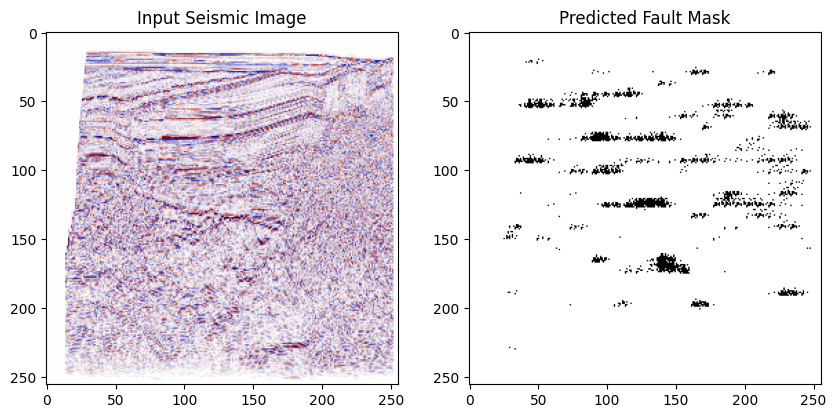

In [53]:
# #Make predictions on the test set
# predictions = model.predict(X_test)
 
# #Check the shape of predictions
# print(f"Predictions shape: {predictions.shape}")  # Should be (num_samples, 64, 64, 1)
 
# #Convert predictions to binary values (0 or 1) using a threshold of 0.5
# predictions_binary = (predictions > 0.5).astype(np.uint8)
 
# #Check the shape of binary predictions
# print(f"Binary Predictions shape: {predictions_binary.shape}")  # Should also be (num_samples, 64, 64, 1)
 
# #If you want to visualize the first prediction, you can do something like this:
# import matplotlib.pyplot as plt
 
# #Visualize the first prediction (image and corresponding mask)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(X_test[0].squeeze())  # Input seismic image (grayscale)
# plt.title("Input Seismic Image")
 
# plt.subplot(1, 2, 2)
# plt.imshow(predictions_binary[0].squeeze())  # Predicted mask (binary)
# plt.title("Predicted fault Mask")
 
# plt.show()

import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_val)

# Check the shape of predictions
print(f"Predictions shape: {predictions.shape}")  # Should be (num_samples, 64, 64, 1)

# Convert predictions to binary values (0 or 1) using a threshold of 0.5
predictions_binary = (predictions > 0.9993).astype(np.uint8)

# Check the shape of binary predictions
print(f"Binary Predictions shape: {predictions_binary.shape}")  # Should also be (num_samples, 64, 64, 1)

# If you want to visualize the first prediction, you can do something like this:
# Visualize the first prediction (image and corresponding mask)
plt.figure(figsize=(10, 5))

# Plot the input seismic image (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(X_test[0].squeeze(), cmap='gray')  # Ensure grayscale for seismic image
plt.title("Input Seismic Image")

# Plot the predicted fault mask (binary)
plt.subplot(1, 2, 2)
plt.imshow(predictions_binary[1], cmap='gray')  # Ensure grayscale for predicted mask
plt.title("Predicted Fault Mask")

# Show the plot
plt.show()


In [ ]:
# # Check the shape and data type of the array
# print("Shape:", binary_mask.shape)
# print("Data Type:", binary_mask.dtype)# Load the .npy file
# file_path = r"C:\Users\nadra\Python\Data\faults\fault-1184.npy"  # Replace with your file path
# binary_mask = np.load(file_path)

# # Print the array
# print("Loaded NumPy Array:")
# print(binary_mask)

# # Check the shape and data type of the array
# print("Shape:", binary_mask.shape)
# print("Data Type:", binary_mask.dtype)

In [ ]:
# #To check Range values for Seismic and Fault
# import numpy as np

# # Function to check the range of values in the seismic and fault images and print color mapping
# def check_color_mapping(X, y, num_samples=5):
#     for i in range(num_samples):
#         # Get unique values in the fault mask
#         unique_vals = np.unique(y[i])
        
#         # Print out what colors correspond to 0 and 1 in the fault mask
#         for val in unique_vals:
#             if val == 0:
#                 print(f"Fault Mask {i+1}: 0 corresponds to black (background)")
#             elif val == 1:
#                 print(f"Fault Mask {i+1}: 1 corresponds to white (fault)")
        
#         # Optionally, print the range of values for seismic images and fault masks
#         print(f"Seismic Image {i+1} - Range: {X[i].min()} to {X[i].max()}")
#         print(f"Fault Mask {i+1} - Range: {y[i].min()} to {y[i].max()}")
#         print("-" * 50)

# # Example usage (assuming X and y are your seismic and fault datasets)
# check_color_mapping(X, y, num_samples=3)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check the range of values in the seismic and fault images and visualize samples
def check_color_mapping(X, y, num_samples=5):
    for i in range(num_samples):
        print(f"Sample {i+1}:")
        
        # Get unique values in the fault mask
        unique_vals = np.unique(y[i])
        print(f"Fault Mask Unique Values: {unique_vals}")
        
        # Count pixels for each unique value
        for val in unique_vals:
            count = np.sum(y[i] == val)
            if val == 0:
                print(f" - {count} pixels correspond to 0 (black, background)")
            elif val == 1:
                print(f" - {count} pixels correspond to 1 (white, fault)")
        
        # Print range of values for seismic images
        print(f"Seismic Image Range: {X[i].min()} to {X[i].max()}")
        print(f"Fault Mask Range: {y[i].min()} to {y[i].max()}")
        print("-" * 50)

        # Optional: visualize seismic image and fault mask
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(X[i].squeeze(), cmap='gray')  # Seismic image
        plt.title("Seismic Image")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(y[i].squeeze(), cmap='gray')  # Fault mask
        plt.title("Fault Mask")
        plt.axis('off')
        
        plt.show()

# Example usage
check_color_mapping(X, y, num_samples=3)


In [ ]:
# #To QC data in both folder
# import os
# import re

# def get_matching_files(seismic_dir, fault_dir):
#     # List files in both directories
#     seismic_files = os.listdir(seismic_dir)
#     fault_files = os.listdir(fault_dir)

#     # Regex to extract 4-digit number
#     pattern = r'(\d{4})'

#     # Get the 4-digit numbers from both directories
#     seismic_numbers = {re.search(pattern, f).group(1) for f in seismic_files if re.search(pattern, f)}
#     fault_numbers = {re.search(pattern, f).group(1) for f in fault_files if re.search(pattern, f)}

#     # Find matching 4-digit numbers
#     matching_numbers = seismic_numbers.intersection(fault_numbers)

#     # Get the corresponding files from both directories
#     matching_files = [
#         (seismic_file, fault_file)
#         for seismic_file in seismic_files
#         for fault_file in fault_files
#         if re.search(pattern, seismic_file) and re.search(pattern, fault_file)
#         and re.search(pattern, seismic_file).group(1) == re.search(pattern, fault_file).group(1)
#     ]

#     return matching_files

# # Example usage
# seismic_dir = r'C:\Users\nadra\Python\Data\seismics1'
# fault_dir = r'C:\Users\nadra\Python\Data\faults'

# matching_files = get_matching_files(seismic_dir, fault_dir)

# # Print the matching files
# for seismic_file, fault_file in matching_files:
#     print(f"Seismic File: {seismic_file} | Fault File: {fault_file}")


In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image

# # Define the paths to your seismic and fault image folders
# seismic_dir = r'C:\Users\nadra\Python\Data\seismics1'
# fault_dir = r'C:\Users\nadra\Python\Data\faults'

# # Function to load images with fault mask validation and fix fault mask inversion
# def load_images(seismic_dir, fault_dir, limit=50, img_size=(1024, 1024)):
#     seismic_images = []
#     fault_masks = []
#     fault_sums = []
    
#     # Get all seismic and fault image filenames (assuming they are .png files)
#     seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
#     fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.png')][:limit]
    
#     # Validate the number of files
#     if len(seismic_files) != len(fault_files):
#         raise ValueError("Mismatch in the number of seismic images and fault masks!")
    
#     # Iterate over the files and load them
#     for seismic_file, fault_file in zip(seismic_files, fault_files):
#         # Load seismic image
#         seismic_img_path = os.path.join(seismic_dir, seismic_file)
#         seismic_img = image.load_img(seismic_img_path, target_size=img_size)
#         seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]
        
#         # Load the fault mask
#         fault_img_path = os.path.join(fault_dir, fault_file)
#         fault_img = image.load_img(fault_img_path, target_size=img_size, color_mode='grayscale')
#         fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]
        
#         # Invert the fault mask: 0 should be fault (black), 1 should be background (white)
#         fault_img = 1 - fault_img  # Invert the mask: 1 = fault, 0 = background
        
#         # Binarize the fault mask (1 = fault, 0 = background)
#         fault_img = (fault_img > 0.5).astype(np.float32)  # Convert to binary (0 or 1)
        
#         # Store the sum of fault pixels for validation
#         fault_sum = np.sum(fault_img)
#         fault_sums.append(fault_sum)
        
#         seismic_images.append(seismic_img)
#         fault_masks.append(fault_img)
    
#     # Convert lists to numpy arrays
#     seismic_images = np.array(seismic_images)
#     fault_masks = np.array(fault_masks)
    
#     # Validate fault mask sums
#     if any(fault_sum == 0 for fault_sum in fault_sums):
#         print("Warning: One or more fault masks are empty!")
#     print(f"Total fault pixels across dataset: {np.sum(fault_masks)}")
    
#     return seismic_images, fault_masks

# # Load images with validation
# X, y = load_images(seismic_dir, fault_dir, limit=50, img_size=(1024, 1024))

# # Check the shape of loaded data
# print(f"Seismic images shape: {X.shape}")
# print(f"Fault masks shape: {y.shape}")

# # Function to overlay seismic image and fault mask
# def overlay_seismic_fault(X, y, num_samples=5):
#     for i in range(num_samples):
#         plt.figure(figsize=(10, 10))
        
#         # Seismic image
#         plt.imshow(X[i], cmap='jet', alpha=1)  # Display seismic image with transparency
        
#         # Fault mask overlay (using 'jet' color map for better visualization)
#         plt.imshow(y[i].squeeze(), cmap='gray', alpha=0.5)  # Fault mask with some transparency
        
#         plt.title(f"Overlay Seismic Image and Fault Mask {i}")
#         plt.axis('off')
#         plt.show()

# # Visualize the first 5 samples with overlay
# overlay_seismic_fault(X, y)

# # Validate the fault mask (check if values are between 0 and 1)
# def validate_fault_mask(y):
#     for i in range(len(y)):
#         unique_vals = np.unique(y[i])
#         if not np.all(np.isin(unique_vals, [0, 1])):  # Check if values are only 0 or 1
#             print(f"Warning: Fault mask {i} contains values other than 0 and 1! Unique values: {unique_vals}")
#         else:
#             print(f"Fault mask {i} is valid (contains only 0s and 1s).")

# # Validate fault masks
# validate_fault_mask(y)


In [ ]:
# import albumentations as A
# import random

# def random_crop_augment(image, mask, crop_size=(875, 875)):
#     # Get the actual height and width of the image
#     h, w, _ = image.shape
    
#     # Ensure crop size is not greater than the image size
#     crop_height = min(crop_size[0], h)
#     crop_width = min(crop_size[1], w)
    
#     # Apply the transformation
#     transform = A.Compose([
#         A.RandomCrop(height=crop_height, width=crop_width, p=1.0),
#         A.faulttalFlip(p=0.5),  # Flip faulttally
#         A.VerticalFlip(p=0.5),    # Flip vertically
#         A.Rotate(limit=30, p=0.5),  # Rotate randomly by 30 degrees
#         A.RandomBrightnessContrast(p=0.5),  # Random brightness and contrast
#         A.ElasticTransform(alpha=1.0, sigma=50, alpha_affine=50, p=0.2)  # Elastic transformation
#     ])
    
#     # Apply the transformations
#     augmented = transform(image=image, mask=mask)
    
#     return augmented['image'], augmented['mask']

# # Apply augmentations
# augmented_seismic_images = []
# augmented_fault_masks = []

# for seismic_img, fault_mask in zip(X, y):
#     augmented_seismic, augmented_fault = random_crop_augment(seismic_img, fault_mask)
#     augmented_seismic_images.append(augmented_seismic)
#     augmented_fault_masks.append(augmented_fault)

# X_augmented = np.array(augmented_seismic_images)
# y_augmented = np.array(augmented_fault_masks)

# # Check the shape of augmented data
# print(f"Augmented Seismic images shape: {X_augmented.shape}")
# print(f"Augmented Fault masks shape: {y_augmented.shape}")

# # Visualize the first 5 augmented samples
# overlay_seismic_fault(X_augmented, y_augmented)


In [ ]:
# import albumentations as A
# import random
# import numpy as np
# import cv2

# def random_crop_augment(image, mask, crop_size=(875, 875)):
#     # Get the actual height and width of the image
#     h, w, _ = image.shape
    
#     # Ensure crop size is not greater than the image size
#     crop_height = min(crop_size[0], h)
#     crop_width = min(crop_size[1], w)
    
#     # Augmentation pipeline
#     transform = A.Compose([
#         A.RandomCrop(height=crop_height, width=crop_width, p=1.0),
#         A.faulttalFlip(p=0.5),                  # Flip faulttally
#         A.VerticalFlip(p=0.5),                    # Flip vertically
#         # A.Rotate(limit=30, p=0.5),                # Rotate randomly by ±30 degrees
#         A.RandomBrightnessContrast(p=0.5),       # Random brightness and contrast
#         A.ElasticTransform(
#             alpha=1.0, sigma=50, alpha_affine=50, # Elastic transformation
#             border_mode=cv2.BORDER_REFLECT_101,   # Avoid boundary artifacts
#             p=0.2
#         )
#     ])
    
#     # Apply the transformations
#     augmented = transform(image=image, mask=mask)
    
#     # Ensure fault mask remains binary
#     augmented_mask = (augmented['mask'] > 0.5).astype(np.float32)
    
#     return augmented['image'], augmented_mask

# # Apply augmentations
# augmented_seismic_images = []
# augmented_fault_masks = []

# for seismic_img, fault_mask in zip(X, y):
#     augmented_seismic, augmented_fault = random_crop_augment(seismic_img, fault_mask)
#     augmented_seismic_images.append(augmented_seismic)
#     augmented_fault_masks.append(augmented_fault)

# X_augmented = np.array(augmented_seismic_images)
# y_augmented = np.array(augmented_fault_masks)

# # Check the shape of augmented data
# print(f"Augmented Seismic images shape: {X_augmented.shape}")
# print(f"Augmented Fault masks shape: {y_augmented.shape}")

# # Validate the augmented fault masks
# validate_fault_mask(y_augmented)

# # Visualize the first 5 augmented samples
# overlay_seismic_fault(X_augmented, y_augmented)


In [ ]:
# #Check ranges after data been augmented
# import numpy as np

# # Function to check the range of values in the seismic and fault images
# def check_values(X_augmented, y_augmented, num_samples=5):
#     for i in range(num_samples):
#         # Print the range of values for seismic image and fault mask
#         print(f"Seismic Image {i+1} - Range: {X_augmented[i].min()} to {X_augmented[i].max()}")
#         print(f"Fault Mask {i+1} - Range: {y_augmented[i].min()} to {y_augmented[i].max()}")

# # Example usage (assuming X_augmented and y_augmented are your augmented datasets)
# check_values(X_augmented, y_augmented, num_samples=3)



In [ ]:
from sklearn.model_selection import train_test_split 

# Split the data into training, validation, and test sets (80-10-10 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Check the shape of training and validation sets
print(f"Training data size: {X_train.shape}")
print(f"Validation data size: {X_val.shape}")
print(f"Test data size: {X_test.shape}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Build a simple CNN model for pixel-wise segmentation
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(875, 875, 1)),  # Input layer (grayscale images of size 64x64)
    
    # Convolutional layers with activation and pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Upsampling to bring the output back to the original size
    tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
    
    # Final layer with 1 channel (for binary segmentation), sigmoid activation
    tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

# # Resize target labels to match the output size of the model
# y_train_resized = tf.image.resize(y_train, (872, 872))
# y_val_resized = tf.image.resize(y_val, (872, 872))

# Train the model
history = model.fit(
    X_train, y_train,  # Training data and labels
    epochs=20,         # Number of epochs
    batch_size=8,      # Batch size (you can adjust this based on your memory)
    validation_data=(X_val, y_val),  # Validation data
    verbose=1
)

In [ ]:
#Fit the data into the model

In [ ]:
# # Train the model
# history = model.fit(
#     X_train, y_train,  # Training data and labels
#     epochs=10,         # Number of epochs
#     batch_size=8,      # Batch size (you can adjust this based on your memory)
#     validation_data=(X_val, y_val),  # Validation data
#     verbose=1
# )

In [ ]:
# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Check the shape of predictions
# print(f"Predictions shape: {predictions.shape}")  # Should be (num_samples, 64, 64, 1)

# # Convert predictions to binary values (1 for fault, 0 for background) using a threshold of 0.5
# predictions_binary = (predictions > 0.5).astype(np.uint8)

# # Check the shape of binary predictions
# print(f"Binary Predictions shape: {predictions_binary.shape}")  # Should also be (num_samples, 64, 64, 1)

# # If you want to visualize the first prediction, you can do something like this:
# import matplotlib.pyplot as plt

# # Visualize the first prediction (image and corresponding mask)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(X_test[0].squeeze(), cmap='gray')  # Input seismic image (grayscale)
# plt.title("Input Seismic Image")

# plt.subplot(1, 2, 2)
# plt.imshow(predictions_binary[0].squeeze(), cmap='gray')  # Predicted mask (binary)
# plt.title("Predicted Fault Mask")

# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Make predictions on the test set
predictions = model.predict(X_test)

# Check the shape of predictions
print(f"Predictions shape: {predictions.shape}")  # Should be (num_samples, 872, 872, 1)

# Convert predictions to binary values (1 for fault, 0 for background) using a threshold of 0.5
predictions_binary = (predictions > 0.5).astype(np.uint8)

# Check the shape of binary predictions
print(f"Binary Predictions shape: {predictions_binary.shape}")  # Should also be (num_samples, 872, 872, 1)

# If the input seismic image is larger than the prediction, you may need to resize the predicted mask:
# Resize the predictions to match the original input image size (875, 875)
predictions_resized = tf.image.resize(predictions_binary, (X_test.shape[1], X_test.shape[2])).numpy()

# Check the shape of resized predictions
print(f"Resized Predictions shape: {predictions_resized.shape}")  # Should be (num_samples, 875, 875, 1)

# Visualize the first prediction (image and corresponding mask)
plt.figure(figsize=(10, 5))

# Seismic image (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(X_test[0].squeeze(), cmap='gray')
plt.title("Input Seismic Image")

# Predicted fault mask (binary)
plt.subplot(1, 2, 2)
plt.imshow(predictions_resized[0].squeeze(), cmap='gray')
plt.title("Predicted Fault Mask")

plt.show()


In [ ]:
print(f"Prediction range: {predictions.min()} to {predictions.max()}")


In [ ]:
# # Visualize the first prediction (binary)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(X_test[0].squeeze(), cmap='gray')  # Input seismic image
# plt.title("Input Seismic Image")

# plt.subplot(1, 2, 2)
# plt.imshow(predictions_binary[1].squeeze(), cmap='gray')  # Predicted fault mask
# plt.title("Predicted Fault Mask")

# plt.show()


In [ ]:
# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from sklearn.model_selection import train_test_split

# # Define the paths to your seismic and fault image folders
# seismic_dir = r'C:\Users\nadra\Python\Data\seismics1'
# fault_dir = r'C:\Users\nadra\Python\Data\faults'

# # Function to load images and limit to 100 images
# def load_images(seismic_dir, fault_dir, limit=100, img_size=(256, 256)):
#     seismic_images = []
#     fault_masks = []
    
#     # Get all seismic image filenames (assuming they are .png files)
#     seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
#     fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.png')][:limit]
    
#     # Iterate over the files and load them
#     for seismic_file, fault_file in zip(seismic_files, fault_files):
#         # Load seismic image and fault mask
#         seismic_img_path = os.path.join(seismic_dir, seismic_file)
#         fault_img_path = os.path.join(fault_dir, fault_file)
        
#         # Load the seismic image (convert to grayscale if needed)
#         seismic_img = image.load_img(seismic_img_path, target_size=img_size, color_mode='grayscale')
#         seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]
        
#         # Load the fault mask image (assuming binary mask)
#         fault_img = image.load_img(fault_img_path, target_size=img_size, color_mode='grayscale')
#         fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]
        
#         seismic_images.append(seismic_img)
#         fault_masks.append(fault_img)
    
#     return np.array(seismic_images), np.array(fault_masks)

# # Load images from folder and limit to 100
# X, y = load_images(seismic_dir, fault_dir, limit=100, img_size=(256, 256))  # Resize to (64, 64)

# # Check the shape of loaded data
# print(f"Seismic images shape: {X.shape}")
# print(f"Fault masks shape: {y.shape}")

# # Split the data into training, validation, and test sets (80-10-10 split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# # Check the shape of training and validation sets
# print(f"Training data size: {X_train.shape}")
# print(f"Validation data size: {X_val.shape}")
# print(f"Test data size: {X_test.shape}")

# # Build a simple CNN model for pixel-wise segmentation
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(256, 256, 1)),  # Input layer (grayscale images of size 64x64)
    
#     # Convolutional layers with activation and pooling
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#     # Upsampling to bring the output back to the original size
#     tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu'),
#     tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
#     tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
    
#     # Final layer with 1 channel (for binary segmentation), sigmoid activation
#     tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Display the model architecture
# model.summary()

# # Train the model
# history = model.fit(
#     X_train, y_train,  # Training data and labels
#     epochs=10,         # Number of epochs
#     batch_size=8,      # Batch size (you can adjust this based on your memory)
#     validation_data=(X_val, y_val),  # Validation data
#     verbose=1
# )

In [ ]:
# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Check the shape of predictions
# print(f"Predictions shape: {predictions.shape}")  # Should be (num_samples, 64, 64, 1)

# # Convert predictions to binary values (0 or 1) using a threshold of 0.5
# predictions_binary = (predictions > 0.5).astype(np.uint8)

# # Check the shape of binary predictions
# print(f"Binary Predictions shape: {predictions_binary.shape}")  # Should also be (num_samples, 64, 64, 1)

# # If you want to visualize the first prediction, you can do something like this:
# import matplotlib.pyplot as plt

# # Visualize the first prediction (image and corresponding mask)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(X_test[0].squeeze(), cmap='gray')  # Input seismic image (grayscale)
# plt.title("Input Seismic Image")

# plt.subplot(1, 2, 2)
# plt.imshow(predictions_binary[0].squeeze(), cmap='gray')  # Predicted mask (binary)
# plt.title("Predicted Fault Mask")

# plt.show()


In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from sklearn.model_selection import train_test_split

# # Define the paths to your seismic and fault image folders
# seismic_dir = r'C:\Users\nadra\Python\Data\seismics1'
# fault_dir = r'C:\Users\nadra\Python\Data\faults'

# # Function to load images and limit to 100 images
# def load_images(seismic_dir, fault_dir, limit=100, img_size=(1024, 1024)):
#     seismic_images = []
#     fault_masks = []
    
#     # Get all seismic image filenames (assuming they are .png files)
#     seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
#     fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.png')][:limit]
    
#     # Iterate over the files and load them
#     for seismic_file, fault_file in zip(seismic_files, fault_files):
#         # Load seismic image and fault mask
#         seismic_img_path = os.path.join(seismic_dir, seismic_file)
#         fault_img_path = os.path.join(fault_dir, fault_file)
        
#         # Load the seismic image (convert to grayscale if needed)
#         seismic_img = image.load_img(seismic_img_path, target_size=img_size, color_mode='grayscale')
#         seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]
        
#         # Load the fault mask image (assuming binary mask)
#         fault_img = image.load_img(fault_img_path, target_size=img_size, color_mode='grayscale')
#         fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]
        
#         seismic_images.append(seismic_img)
#         fault_masks.append(fault_img)
    
#     return np.array(seismic_images), np.array(fault_masks)

# # Load images from folder and limit to 100
# X, y = load_images(seismic_dir, fault_dir, limit=100)

# # Check the shape of loaded data
# print(f"Seismic images shape: {X.shape}")
# print(f"Fault masks shape: {y.shape}")

# # Split the data into training, validation, and test sets (80-10-10 split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# # Check the shape of training and validation sets
# print(f"Training data size: {X_train.shape}")
# print(f"Validation data size: {X_val.shape}")
# print(f"Test data size: {X_test.shape}")


In [ ]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from sklearn.model_selection import train_test_split

# # Define the paths to your seismic and fault image folders
# seismic_dir = r'C:\Users\nadra\Python\Data\seismics1'
# fault_dir = r'C:\Users\nadra\Python\Data\faults'

# # Function to load images and limit to 100 images
# def load_images(seismic_dir, fault_dir, limit=100):
#     seismic_images = []
#     fault_masks = []
    
#     # Get all seismic image filenames (assuming they are .png files)
#     seismic_files = [f for f in os.listdir(seismic_dir) if f.endswith('.png')][:limit]
#     fault_files = [f for f in os.listdir(fault_dir) if f.endswith('.png')][:limit]
    
#     # Iterate over the files and load them
#     for seismic_file, fault_file in zip(seismic_files, fault_files):
#         # Load seismic image and fault mask
#         seismic_img_path = os.path.join(seismic_dir, seismic_file)
#         fault_img_path = os.path.join(fault_dir, fault_file)
        
#         # Load the seismic image (convert to grayscale if needed)
#         seismic_img = image.load_img(seismic_img_path, color_mode='grayscale')
#         seismic_img = image.img_to_array(seismic_img) / 255.0  # Normalize to [0, 1]
        
#         # Load the fault mask image (assuming binary mask)
#         fault_img = image.load_img(fault_img_path, color_mode='grayscale')
#         fault_img = image.img_to_array(fault_img) / 255.0  # Normalize to [0, 1]
        
#         seismic_images.append(seismic_img)
#         fault_masks.append(fault_img)
    
#     return np.array(seismic_images), np.array(fault_masks)

# # Load images from folder and limit to 100
# X, y = load_images(seismic_dir, fault_dir, limit=100)

# # Check the shape of loaded data
# print(f"Seismic images shape: {X.shape}")
# print(f"Fault masks shape: {y.shape}")

# # Split the data into training, validation, and test sets (80-10-10 split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# # Check the shape of training and validation sets
# print(f"Training data size: {X_train.shape}")
# print(f"Validation data size: {X_val.shape}")
# print(f"Test data size: {X_test.shape}")


In [ ]:
# import numpy as np
# import matplotlib.image as mpimg
# import os

# # Function to load seismic and fault images
# def load_data(seismic_paths, fault_paths):
#     seismic_images = []
#     fault_masks = []
    
#     for seismic_path, fault_path in zip(seismic_paths, fault_paths):
#         # Read and normalize the seismic image (RGB to grayscale)
#         seismic_img = mpimg.imread(seismic_path)
#         grayscale_seismic = 0.2989 * seismic_img[:, :, 0] + 0.5870 * seismic_img[:, :, 1] + 0.1140 * seismic_img[:, :, 2]

#         # Read and check the fault mask
#         fault_img = mpimg.imread(fault_path)
        
#         # Convert fault mask to grayscale if it has 3 channels
#         if len(fault_img.shape) == 3:  # Check if RGB
#             fault_img = 0.2989 * fault_img[:, :, 0] + 0.5870 * fault_img[:, :, 1] + 0.1140 * fault_img[:, :, 2]

#         # Normalize the fault mask to [0, 1]
#         fault_mask_grayscale = (fault_img - fault_img.min()) / (fault_img.max() - fault_img.min())
        
#         # Append processed images to the lists
#         seismic_images.append(grayscale_seismic)
#         fault_masks.append(fault_mask_grayscale)
    
#     # Convert lists to numpy arrays
#     return np.array(seismic_images), np.array(fault_masks)

# # Example usage with multiple image paths
# seismic_paths = [
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1184.png',
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1176.png',
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1376.png',
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1377.png',
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1378.png',
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1379.png',
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1380.png',
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1381.png',
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1382.png',
#     r'C:\Users\nadra\Python\Data\seismics1\seismic-1383.png'
# ]

# fault_paths = [
#     r'C:\Users\nadra\Python\Data\faults\fault-1184.png',
#     r'C:\Users\nadra\Python\Data\faults\fault-1176.png',
#     r'C:\Users\nadra\Python\Data\faults\fault-1376.png',
#     r'C:\Users\nadra\Python\Data\faults\fault-1377.png',
#     r'C:\Users\nadra\Python\Data\faults\fault-1378.png',
#     r'C:\Users\nadra\Python\Data\faults\fault-1379.png',
#     r'C:\Users\nadra\Python\Data\faults\fault-1380.png',
#     r'C:\Users\nadra\Python\Data\faults\fault-1381.png',
#     r'C:\Users\nadra\Python\Data\faults\fault-1382.png',
#     r'C:\Users\nadra\Python\Data\faults\fault-1383.png'
# ]

# # Load the seismic and fault data
# seismic_images, fault_masks = load_data(seismic_paths, fault_paths)

# # Check the shape of the data
# print(f"Seismic images shape: {seismic_images.shape}")  # Shape should be (number_of_images, height, width)
# print(f"Fault masks shape: {fault_masks.shape}")        # Shape should be (number_of_images, height, width)


In [ ]:
# from sklearn.model_selection import train_test_split

# # Split the dataset into training, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(seismic_images, fault_masks, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# #Add channel into the data
# X_train = np.expand_dims(X_train, axis=-1)  
# y_train = np.expand_dims(y_train, axis=-1)  

# X_val = np.expand_dims(X_val, axis=-1)  
# y_val = np.expand_dims(y_val, axis=-1)  

# X_test = np.expand_dims(X_test, axis=-1)  
# y_test = np.expand_dims(y_test, axis=-1)  

In [ ]:
# Check the sizes
print(f"Training data size: {X_train.shape}")
print(f"Validation data size: {X_val.shape}")
print(f"Test data size: {X_test.shape}")

# Example Visualization of the first image in the training set
plt.figure(figsize=(10, 10))

# Display the grayscale seismic image (no colormap needed, it's already grayscale)
plt.imshow(X_train[0], cmap='gray', alpha=1.0)  # Seismic image in grayscale
plt.axis('off')  # Hide axis

# Overlay the fault mask with transparency (alpha = 0.5)
plt.imshow(y_train[0], cmap='Reds', alpha=0.6)  # Fault mask in red with transparency
plt.axis('off')  # Hide axis

# Show the result
plt.show()

In [ ]:
#Step 3: Simple CNN Model 

In [ ]:
from tensorflow.keras import layers, models

def simple_cnn(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # For binary segmentation
    return model

# Example usage with grayscale input (1 channel)
input_shape = (256, 256, 1)  # Adjust as per your image size
model = simple_cnn(input_shape)
model.summary()


In [ ]:
print(f"X_train shape: {X_train.shape}")  # Should be (batch_size, height, width, channels)
print(f"y_train shape: {y_train.shape}")  

In [ ]:
# Assuming 'model' is your Simple CNN model (from previous code)
model.compile(
    optimizer='adam',  # Optimizer, you can also try others like 'sgd' or 'rmsprop'
    loss='binary_crossentropy',  # For binary classification/segmentation
    metrics=['accuracy']  # You can also use other metrics like 'iou' for segmentation
)


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


In [ ]:
history = model.fit(
    X_train, y_train,  # Training data and labels
    epochs=10,  # Number of epochs, adjust as needed
    batch_size=16,  # Batch size, adjust based on memory
    validation_data=(X_val, y_val),  # Validation data to check performance during training
    verbose=1  # Print training progress
)

In [ ]:
#Step 3 : Model DeeplabV3+ (Delete)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# def deeplabv3_plus(input_shape):
#     # Load the pre-trained DeepLabV3+ model (with Xception backbone)
#     base_model = tf.keras.applications.Xception(input_shape=input_shape, include_top=False, weights='imagenet')

#     # Atrous Spatial Pyramid Pooling (ASPP) layer
#     x = layers.Conv2D(256, (3, 3), dilation_rate=6, padding='same')(base_model.output)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)

#     # Decoder
#     x = layers.Conv2D(128, (3, 3), padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)

#     # Output layer: sigmoid activation for binary segmentation
#     x = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)
    
#     # Upsample to match original input size
#     x = layers.UpSampling2D(size=(4, 4))(x)  # This should match your desired output size

#     # Create the model
#     model = models.Model(inputs=base_model.input, outputs=x)
    
#     # Compile the model
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
#     return model

# # Define input shape based on your image dimensions
# input_shape = X_train.shape[1:]  # (Height, Width, Channels)

# # Check the shape of your data to ensure it is 3D and adjust if necessary
# if X_train.shape[-1] == 1:  # If the images are grayscale
#     input_shape = (X_train.shape[1], X_train.shape[2], 1)  # Ensure it's 1 channel for grayscale images
# else:
#     input_shape = (X_train.shape[1], X_train.shape[2], 3)  # If RGB, it will have 3 channels

# # Build the DeepLabV3+ model
# model = deeplabv3_plus(input_shape)

# # Display the model architecture
# model.summary()


In [ ]:
# print(f"X_train shape: {X_train.shape}")  # Should be (batch_size, height, width, channels)
# print(f"y_train shape: {y_train.shape}")  # Should be (batch_size, height, width, 1)


In [ ]:
#shape the train data to have 1 channel and divisible by 32

In [ ]:
# X_train = np.expand_dims(X_train, axis=-1)  # Shape becomes (1, 2664, 4166, 1)
# y_train = np.expand_dims(y_train, axis=-1)  # Shape becomes (1, 2664, 4166, 1)


In [ ]:
# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")


In [ ]:
# # Resize to dimensions divisible by 32 (e.g., 512x512)
# target_size = (512, 512)

# X_train = tf.image.resize(X_train, target_size).numpy()  # Resize seismic images
# y_train = tf.image.resize(y_train, target_size).numpy()  # Resize fault masks


In [ ]:
# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")

In [ ]:
# from segmentation_models import DeepLabV3Plus

# # Create the model
# model = DeepLabV3Plus(
#     input_shape=(512, 512, 1),  # Input shape with grayscale data
#     classes=1,  # Number of classes
#     activation='sigmoid'  # Use sigmoid for binary segmentation
# )


In [ ]:
# import tensorflow as tf
# import keras

# print("TensorFlow version:", tf.__version__)
# print("Keras version:", keras.__version__)


In [ ]:
# # Train the model
# history = model.fit(
#     X_train, y_train,  # Training data and labels
#     epochs=10,         # Number of epochs
#     batch_size=8,      # Batch size
#     validation_data=(X_val, y_val),  # Validation data
#     verbose=1          # Display progress
# )